# Python Project: An analysis of League of Legends Data
# How to win regarding statistics

Edited by:
Antoine Brochot 20180636
Yann Nunes Da Silva 20180993

Hello Mr. Chaabane,

As you are the new head of the League of Legends team G2 Esports, we provide you our studies on the game so as you get a better overview of how to lead your team to victory. The calculus were made with a dataset of more than fifty thousand games during last season, and as you may not be very familiar with the game we will try to be as explicit as possible.

Best regards,

Antoine Brochot
Yann Nunes da Silva

First of all, League of Legends is a MOBA game developed by Riot Games in 2009. It is today the most watched esport game in the world, with more of 44 million different viewers in the world for the final (for instance the final of rugby worldcup gathered 3.35 million viewers).

The game consists in two teams of 5 players each, trying to destroy the enemy's nexus (a building).
Each player embodies a different champion, with unique abilities.
Each team has 11 towers in total, 3 per lane and 2 defending nexus.
To get acces to enemy nexus, a team must destroy the 3 towers of a lane, the inhibitor of the lane and finally destroy the 2 nexus towers.
All players spread on the map (wich is always the same) and try to destroy ennemy towers to finally access to the enemy nexus.
There are a few more objectives such as:

Dragon: provides a buff for the team which killed it, untill the end of the game. Spawns in his pit at 5:00, then takes 5 minutes to respawn once killed.

Rift Herald: once killed, it helps to destroy one or severall towers, depending on how the team owning it defends it.
Spawns in his pit at 8:00 (8 minutes after the beginning of the game), then takes 6 minutes to respawn once killed. Disappears at 20:00.

Baron: provides a very powerful buff for the team which killed it, for 3 minutes. Replaces the Rift Herald in his pit at 20:00, then takes 7 minutes to respawn after being killed.

Inhibitor: After destroying the third enemy tower of a lane, the inhibitor of the lane becomes vulnerable. Once destroyed, super minions will be summoned in addition of normal minions, this way the team which destroyed inhibitor can progress easier toward nexus towers and nexus.


N.B: an inhibitor will respawn 5 minutes after being destroyed, in order to leave a chance to the attacked team to take revenge.



The last thing to know is that the map is symmetrical (except for a few details). The team 1 is called "blue" (playing in the blue side of the map), team 2 is called "red" (red side of the map). We will see that there are a few differences between the two.

We start by importing the needed libraries, and converting the game duration from seconds to minutes.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression

league=pd.read_csv('games.csv')
league["gameDuration"] = league["gameDuration"]//60

In [3]:
league.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,32,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,30,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,24,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,29,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,34,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


Here above is a quick overview of the dataset:
gameId and creationTime are not relevant information: we will focus on the first objectives secured by one of the teams.

# Game Duration

(0, 60)

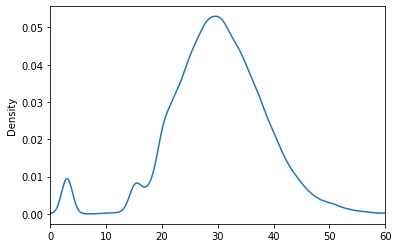

In [4]:
league['gameDuration'].plot.kde()
plt.xlim(0,60)

(0, 60)

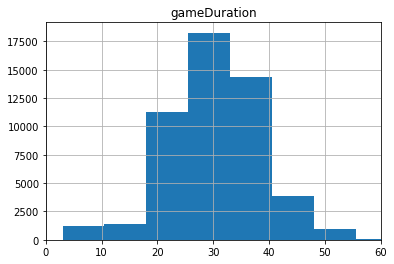

In [6]:
league.hist('gameDuration')
plt.xlim(0,60)

We can see that there is a little spike around 3 mins, it corresponds to "remade games": they are cancelled because one of the 10 players didn't manage to connect. They last only 3 minutes and are over, with no win or loss for all players.
After this step, there is another spike at 15 mins, it is the time when a team can surrender, if every member agrees.
Then we can see that the majority of the games last from 20 to 40 mins.

## Impact of taking First Tower

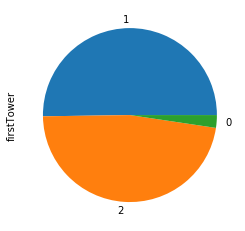

In [7]:
league['firstTower'].value_counts().plot.pie()

We can see that in the majority of games, the blue team is the first to take a tower.
NB: Games with no turret destroyed are remade games.

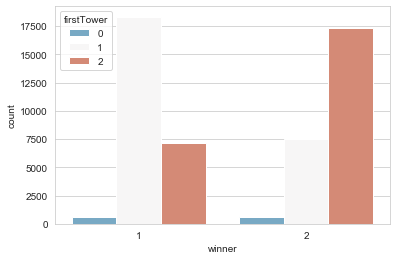

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='winner',hue='firstTower',data=league,palette='RdBu_r')

Afterwards the team who managed to destroy the first turret is way more likely to win the game:

Text(0.5, 1.0, 'Winrates when Blue team takes first tower')

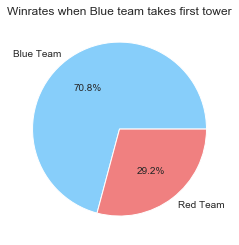

In [9]:
tone = league.loc[league['firstTower']==1]
#make a subdataset with the games where first turret was destroyed by blue team
tonewin = tone.loc[tone['winner']==1]
#from this new dataset make a subdataset with the games where blue team won

counttone=tonewin['winner'].count()
#count the games where blue team won after taking first turret

total = league['firstTower'].value_counts()[1]
#counts every game where blue team destroyed first turret

#same for red team

ttwo = league.loc[league['firstTower']==2]
ttwowin = ttwo.loc[ttwo['winner']==2]

countttwo = ttwowin['winner'].count()

total2= league['firstTower'].value_counts()[2]

labels='Blue Team', 'Red Team'
rates = [counttone/total, 1-(counttone/total)]
#explode=(0.1,0)

plt.pie(rates, labels=labels,colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')

plt.title('Winrates when Blue team takes first tower')




#league.loc[:,['firstTower']==1,['winner']==1]

Text(0.5, 1.0, 'Winrates when Red team takes first tower')

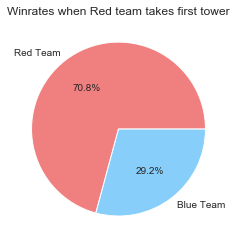

In [10]:
labels2='Red Team', 'Blue Team'
rates2 = [countttwo/total2, 1-(countttwo/total2)]
#explode=(0.1,0)

plt.pie(rates2, labels=labels2, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%')

plt.title('Winrates when Red team takes first tower')

In [11]:
print(counttone)
print(countttwo)
#even if the proportions are equal, we can see that the number of games won
#after taking first turret is different

18320
17287


Taking first turret ensures winning at a 70% rate, regardless of the side of the map.

# Impact of taking First Blood

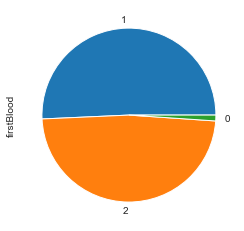

In [12]:
league['firstBlood'].value_counts().plot.pie()

Once again there is a small advantage towards blueside.

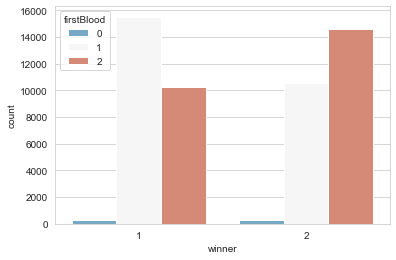

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='winner',hue='firstBlood',data=league,palette='RdBu_r')

Text(0.5, 1.0, 'Winrates when Blue team takes first blood')

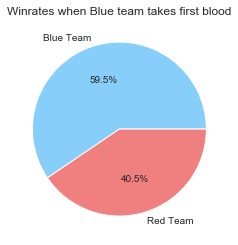

In [16]:
kOne = league.loc[league['firstBlood']==1]
#make a subdataset with the games where blue team got first blood
kOneWin = kOne.loc[kOne['winner']==1]
#from this new dataset make a subdataset with the games where blue team won

countKOne=kOneWin['winner'].count()
#count the games where blue team won after taking first blood

kTotal = league['firstBlood'].value_counts()[1]
#counts every game where blue team got first blood

#same for red team

kTwo = league.loc[league['firstBlood']==2]
kTwoWin = kTwo.loc[kTwo['winner']==2]

countKTwo = kTwoWin['winner'].count()

kTotal2= league['firstBlood'].value_counts()[2]

labels='Blue Team', 'Red Team'
krates = [countKOne/kTotal, 1-(countKOne/kTotal)]
#explode=(0.1,0)

plt.pie(krates, labels=labels,colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')

plt.title('Winrates when Blue team takes first blood')

Text(0.5, 1.0, 'Winrates when Red team takes first blood')

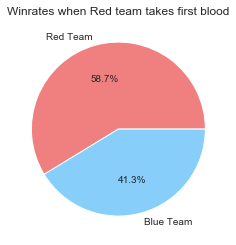

In [17]:
labels2='Red Team', 'Blue Team'
rates2 = [countKTwo/kTotal2, 1-(countktwo/ktotal2)]
#explode=(0.1,0)

plt.pie(rates2, labels=labels2, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%')

plt.title('Winrates when Red team takes first blood')

Taking first blood equals to almost 60% chance of winning. This time, we can almost observe a 1% difference depending on the side.

The team who won generally got first blood (was the first to slain an enemy player)

# Impact of taking first Baron

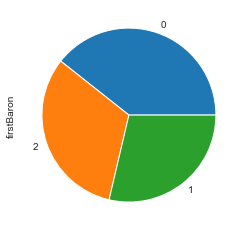

In [18]:
league['firstBaron'].value_counts().plot.pie()

As the baron is hard to kill, it is not an objective taken in every game. 

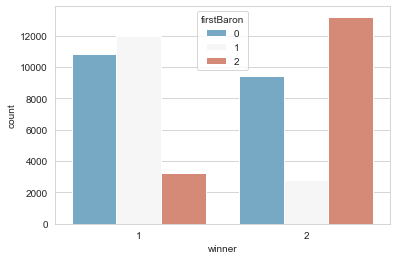

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='winner',hue='firstBaron',data=league,palette='RdBu_r')

Text(0.5, 1.0, 'Winrates when Blue team takes first baron')

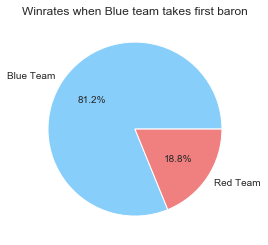

In [20]:
bOne = league.loc[league['firstBaron']==1]
#make a subdataset with the games where blue team got first baron
bOneWin = bOne.loc[bOne['winner']==1]
#from this new dataset make a subdataset with the games where blue team won

countBOne=bOneWin['winner'].count()
#count the games where blue team won after taking first baron

bTotal = league['firstBaron'].value_counts()[1]
#counts every game where blue team got first baron

#same for red team

bTwo = league.loc[league['firstBaron']==2]
bTwoWin = bTwo.loc[bTwo['winner']==2]

countBTwo = bTwoWin['winner'].count()

bTotal2= league['firstBaron'].value_counts()[2]

labels='Blue Team', 'Red Team'
bRates = [countBOne/bTotal, 1-(countBOne/bTotal)]
#explode=(0.1,0)

plt.pie(bRates, labels=labels,colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')

plt.title('Winrates when Blue team takes first baron')

Text(0.5, 1.0, 'Winrates when Red team takes first baron')

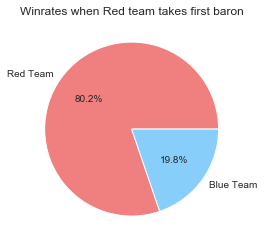

In [21]:
labels2='Red Team', 'Blue Team'
rates2 = [countBTwo/bTotal2, 1-(countBTwo/bTotal2)]
#explode=(0.1,0)

plt.pie(rates2, labels=labels2, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%')

plt.title('Winrates when Red team takes first baron')

With 80% to win after killing it, baron is the most decisive objective on the map. We can notice once again that there is a 1% difference between red and blue side, in favor of blue side.

# Global Winrates

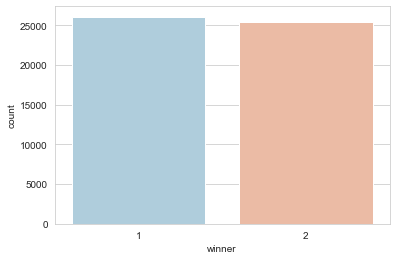

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=league,palette='RdBu_r')

Here we can see a notable difference between the winrate of the two sides. It appears that the blueside winrate (1) is higher than the redside's (2). 

Text(0.5, 1.0, 'Total winrates of each side of the map')

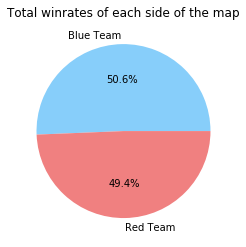

In [15]:
winb=league['winner'].value_counts()[1]
winr=league['winner'].value_counts()[2]
wLabels='Blue Team', 'Red Team'
plt.pie([winb, winr], labels=wLabels, colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')

plt.title('Total winrates of each side of the map')

With a +0.6 / -0.4 difference on such a number of games, we can affirm that the game is unbalanced.

# Study and impact of champion selection


Information about champion id could be find in champion_info.json

In [37]:
oneWin = league.loc[league['winner']==1]
#make a subdataset with the games where blue team win
oneTotal = oneWin['t1_champ1id'].value_counts()+oneWin['t1_champ2id'].value_counts()+oneWin['t1_champ3id'].value_counts()+oneWin['t1_champ4id'].value_counts()+oneWin['t1_champ5id'].value_counts()
#count for each champion the number of game where blue team win and the champion is on blue team
total1= league['t1_champ1id'].value_counts()+league['t1_champ2id'].value_counts()+league['t1_champ3id'].value_counts()+league['t1_champ4id'].value_counts()+league['t1_champ5id'].value_counts()
#count the total of game played by each champion on blue team
winrateOne=oneTotal/total1*100
#find the rate of win for every champion on blue team

print('')
print("Winrate of every champion for blue side")
print('')
print(winrateOne)
#same for red team

twoWin = league.loc[league['winner']==2]
#make a subdataset with the games where red team win

oneTotal = oneWin['t2_champ1id'].value_counts()+oneWin['t2_champ2id'].value_counts()+oneWin['t2_champ3id'].value_counts()+oneWin['t2_champ4id'].value_counts()+oneWin['t2_champ5id'].value_counts()
#count for each champion the number of game where red team win and the champion is on red team
total2=league['t2_champ1id'].value_counts()+league['t2_champ2id'].value_counts()+league['t2_champ3id'].value_counts()+league['t2_champ4id'].value_counts()+league['t2_champ5id'].value_counts()
#count the total of game played by each champion on red team
winrateTwo=oneTotal/total2*100
#find the rate of win for every champion on red team

print('')
print("Winrate of every champion for red side")
print('')
print(winrateTwo)


print('')
print("Winrate of every champion")
print('')

winrateGlobal=(winrateOne+winrateTwo)/2
#rate of win for every champion
print(winrateGlobal)

print('')
print("Most winning champion")
print('')

idMaxChampion=winrateGlobal.idxmax(axis=0)
maxWinrate=max(winrateGlobal)
idMinChampion=winrateGlobal.idxmin(axis=0)
minWinrate=min(winrateGlobal)

print(idMaxChampion)
#shows the id of the most winning champion
print(maxWinrate)
#shows the winrate of the most winning champion

print('')
print("Least winning champion")
print('')


print(winrateGlobal.idxmin(axis=0))
#shows the id of the least winning champion
min(winrateGlobal)
#shows the winrate of the least winning champion


Winrate of every champion for blue side

1      53.226798
2      47.335025
3      45.880682
4      51.383399
5      52.186938
6      50.420875
7      46.553268
8      50.094518
9      50.845547
10     50.050352
11     51.155779
12     51.099537
13     40.221402
14     50.520341
15     51.321138
16     52.132856
17     52.830189
18     52.752506
19     51.683443
20     50.158730
21     53.346203
22     47.902474
23     52.923977
24     50.652985
25     49.212202
26     49.456522
27     54.621849
28     50.383632
29     53.627760
30     50.421941
         ...    
141    50.609508
143    52.298352
150    51.474392
154    48.194662
157    50.724269
161    51.282051
163    49.294355
164    46.145374
201    51.360174
202    49.874435
203    50.724638
222    51.426481
223    46.072685
236    47.698241
238    50.059630
240    51.634724
245    50.568643
254    51.066580
266    48.284960
267    52.085182
268    44.267516
412    47.610209
420    48.703956
421    48.095910
427    47.058824
429   

47.83631946553295

In this result one could see winrate depending side and the global winrate. The most winning champion in season 9 is Annie (id=1) with a winrate of 52.9% and the least winning champion is Nautilus (id=111) with a winrate of 47.8. With a range of 5.1 league of legend is relatively balanced game. There are no champion that will win every time, chances of winning are relatively even. 

In [38]:
difference=abs(winrateOne-winrateTwo)
#shows the difference of winrate between the two side

mostAffected=max(difference)
mostAffectedChampion=difference.idxmin(axis=0)

leastAffectedChampion=difference.idxmin(axis=0)
leastAffected=min(difference)

print('')
print("Difference on winrate for each champion dependind of the side")
print('')
print(difference)
print('')

print("Most affected champion")
print('')
print(mostAffectedChampion)
print(mostAffected)
print('')

print("Least affected champion")
print('')
print(leastAffectedChampion)
print(leastAffected)


Difference on winrate for each champion dependind of the side

1       0.560131
2       4.265487
3       6.372947
4       2.895219
5       3.138715
6       3.020076
7       6.134904
8       1.761918
9       0.915017
10      1.634511
11      1.862850
12      0.788335
13     18.350026
14      0.198739
15      1.470541
16      5.696149
17      3.670110
18      3.414248
19      3.198595
20      0.873718
21      5.347505
22      4.634036
23      5.755094
24      1.152691
25      4.021797
26      1.592429
27      6.942524
28      4.292627
29      5.559578
30      2.016688
         ...    
141     2.422331
143     0.114293
150     1.114849
154     1.562226
157     0.305169
161     2.037719
163     5.710601
164     4.059125
201     2.042231
202     2.390459
203     3.077644
222     2.419005
223     7.920164
236     5.662395
238     1.324787
240     2.881889
245     0.221706
254     1.169673
266     5.993114
267     3.560592
268    13.247821
412     5.502840
420     2.564401
421     2.385521
4

This result shows that surprisinggly for some of the champion, the side could affect the winrate. The most affected champion is ryze (id=13) with a winrate on blue side inferior by 18.4. Ryze Should be played on red side to fully exploit its capacity. This fact is not well know. However, some are not really affected by the side of the game. Indeed, Dr.Mundo (id=36) is the most polyvalent champion with nearly no change in his winrate depending of the side.

In [43]:

playRate=(league['t1_champ1id'].value_counts()/51490*100+league['t1_champ2id'].value_counts()/51490*100+league['t1_champ3id'].value_counts()/51490*100+league['t1_champ4id'].value_counts()/51490*100+league['t1_champ5id'].value_counts()/51490*100+league['t2_champ1id'].value_counts()/51490*100+league['t2_champ2id'].value_counts()/51490*100+league['t2_champ3id'].value_counts()/51490*100+league['t2_champ4id'].value_counts()/51490*100+league['t2_champ5id'].value_counts()/51490*100)/10
idMaxPlayRate=playRate.idxmax(axis=0)
maxPlayRate=max(playRate)
idMinPlayRate=playRate.idxmin(axis=0)
minPlayRate=min(playRate)

print('Play rate')
print('')
print(playRate)
print('')

print('Most played champion')
print('')
print(idMaxPlayRate)
print(maxPlayRate)
print('')

print('Least played champion')
print('')
print(idMinPlayRate)
print(minPlayRate)


Play rate

1      0.636434
2      0.304719
3      0.527675
4      0.697223
5      0.630219
6      0.459312
7      0.433676
8      0.622063
9      0.337735
10     0.389008
11     1.156535
12     0.675083
13     0.200427
14     0.407846
15     0.772189
16     1.193241
17     0.804816
18     2.521460
19     1.136337
20     0.254030
21     1.200427
22     1.046999
23     0.792970
24     1.285298
25     1.152845
26     0.281802
27     0.276753
28     0.313847
29     1.716450
30     0.195572
         ...   
141    1.913575
143    0.457370
150    0.761701
154    0.487085
157    1.528841
161    0.618955
163    0.388619
164    0.366285
201    0.727131
202    1.562245
203    0.222762
222    1.549815
223    0.328607
236    1.611963
238    1.254613
240    0.343562
245    0.945038
254    0.583026
266    0.146242
267    0.911633
268    0.248592
412    2.525151
420    0.287823
421    0.278889
427    0.208973
429    0.693727
432    0.724995
497    1.328607
498    1.523208
516    0.925617
Length: 138, 

This result highlights the fact that there are no champion that will appear in every game. Indeed the most played champion is Thresh with a playrate of only 2.5%. However some champion were avoid by player this season like Skarner with a playrate of 0.1%.

# Conclusion

Our recommandation for this season would be to always adapts your strategy to the side of the game you played. Indeed as we show in this result being on the blue or red side of the game will impact the course of the game. In general you will be more likely to win with the blue side. Moreover always check that champions in your team are not affected by the side. Indeed for example avoid ryze is a major threat on red side but a burden on blue side. Keep in mind that as always taking first tower and kill in game is a strategic move that could lead to victory. However if you happened to lost one of this objective the result shows that the game is not over and a comeback is possible. Do not overlook to take the baron if possible, the objective is likely to lead you to victory. Hope that you find this study interesting.
Best regards